# How do subscribers and customers use the Ford GoBike System?
## by Jan W.

## Investigation Overview

This presentation will outline similarities and differences in subscriber and customer usage patterns in February 2019 to provide interesting insights into the daily customer behavior of Ford GoBike system users.

## Dataset Overview

The Ford GoBike System data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in February 2019. After cleaning due to missing data, tidiness and quality issues the dataset contains 166598 entries and 9 columns for further analysis concerning usage information like start date or trip duration and member information like user type, member gender or age.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata_clean.csv')

## On which days of the week do users use the service?

Interestingly, most users do not use the service on weekends, but during the week. Instead, user numbers drop by almost half at the weekend as opposed to during the week. How can this drop at the weekend be explained?

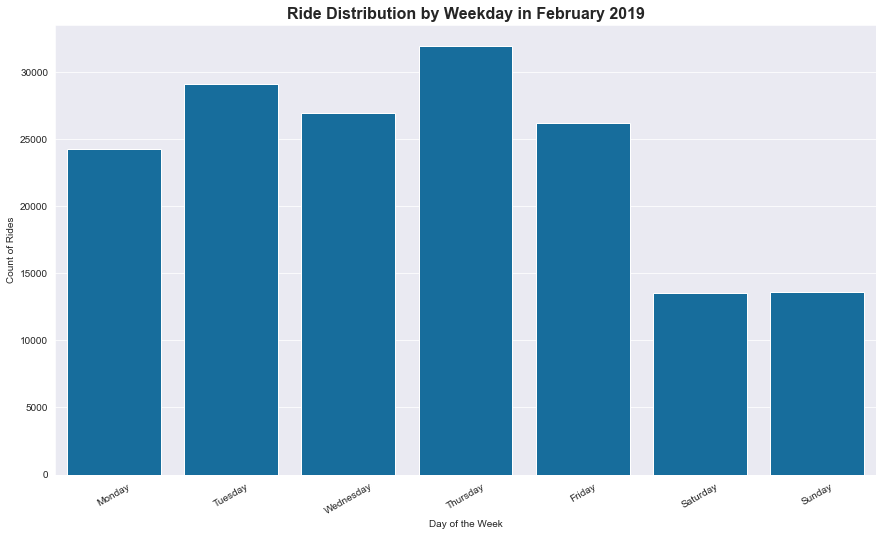

In [3]:
# convert start_day into ordered categorical type
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_type = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_day'] = df['start_day'].astype(weekday_type)

# trip distribution by day
plt.figure(figsize = [14.70, 8.27])
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')
sb.countplot(data=df, x='start_day', color=base_color)
plt.xticks(rotation=30);
plt.title('Ride Distribution by Weekday in February 2019', fontsize=16, fontweight='semibold');
plt.xlabel('Day of the Week')
plt.ylabel('Count of Rides');

## At what times do subscribers and customers use the service?

To get an answer to the falling user numbers on weekends, let's take a look at the hours in which subscribers and customers use the service. Interestingly, in February 2019, both groups use the service predominantly between 7 to 9 o'clock and 16 to 18 o'clock. Nevertheless, the vast majority of trips are made by subscribers. Do both subscribers and customers use the service to commute to work every day?

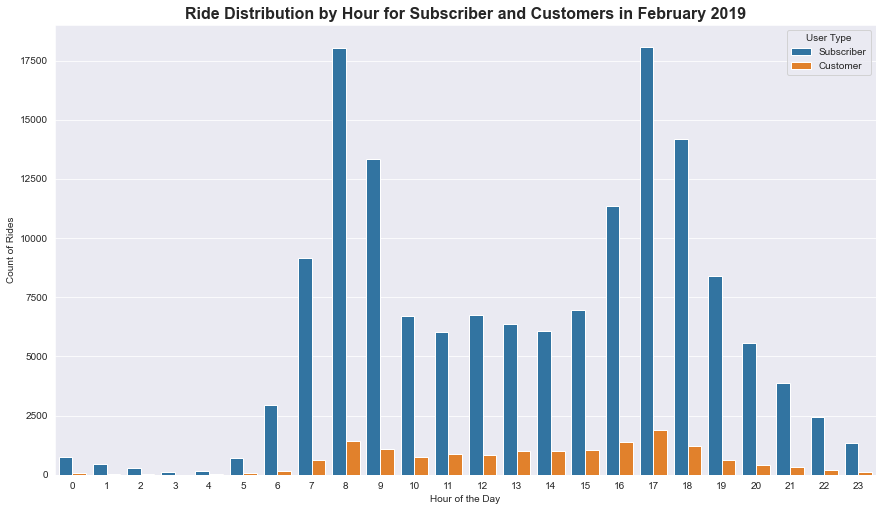

In [5]:
# trip distribution by hours for subscribers and customer
plt.figure(figsize = [14.70, 8.27])
sb.countplot(data=df, x='start_hour', hue='user_type');
plt.title('Ride Distribution by Hour for Subscriber and Customers in February 2019', fontsize=16, fontweight='semibold');
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Rides')
plt.legend(title='User Type');

## Do subscribers and customers display different usage patterns throughout the week?
Both subscribers and customers use the service to travel to work every day. However, the two groups also show differences. And the differences clarify the question of why weekend usage drops by almost half. While subscribers hardly use the service at all on weekends, customers also access the service on weekends to cover medium-length distances during the day. Since significantly more trips are made by subscribers than by customers in total, the usage figures decline at the weekend.

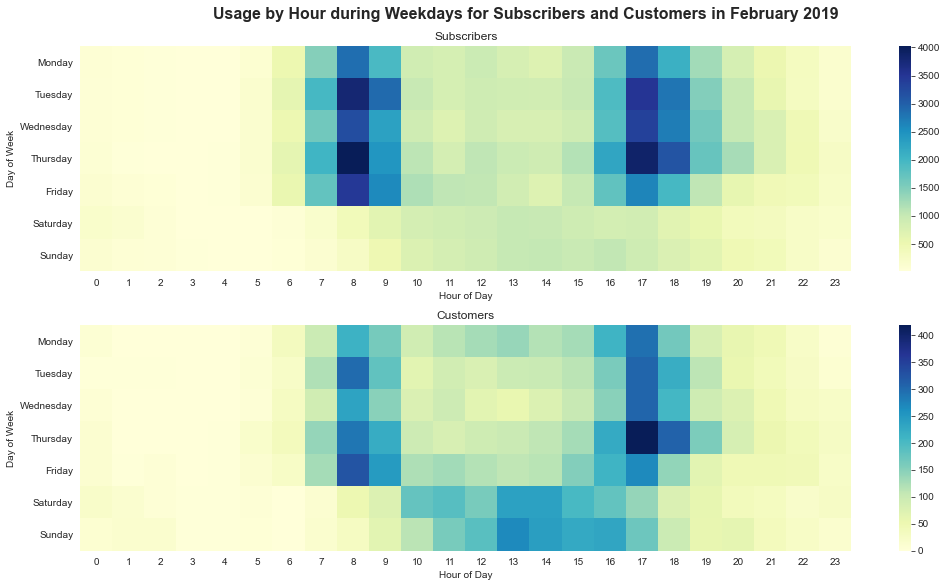

In [6]:
plt.figure(figsize=[14.70, 8.27]);

plt.subplot(2, 1, 1)
# distribution of usage by weekday and hour for subscriber
subs = df.query('user_type == "Subscriber"').groupby(['start_day', 'start_hour']).size().reset_index(name='counts');
subs = subs.pivot('start_day', 'start_hour', 'counts')
sb.heatmap(subs, cmap = 'YlGnBu');
plt.suptitle('Usage by Hour during Weekdays for Subscribers and Customers in February 2019', fontsize=16, fontweight='semibold');
plt.title('Subscribers');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();

plt.subplot(2, 1, 2)
customers = df.query('user_type == "Customer"').groupby(['start_day', 'start_hour']).size().reset_index(name='counts');
customers = customers.pivot('start_day', 'start_hour', 'counts')
sb.heatmap(customers, cmap = 'YlGnBu');
plt.title('Customers');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();

In [ ]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 699972 bytes to slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck.slides.html
Use Control-C to stop this server
